# Predecir ingresos por persona

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
pd.set_option('display.max_columns', 500)

In [13]:
dataframe = pd.read_csv('./encuesta-anual-hogares-2018.csv', encoding='latin1')
dataframe.head(10)

,id,nhogar,miembro,comuna,dominio,edad,sexo,parentesco_jefe,situacion_conyugal,num_miembro_padre,num_miembro_madre,estado_ocupacional,cat_ocupacional,calidad_ingresos_lab,ingreso_total_lab,calidad_ingresos_no_lab,ingreso_total_no_lab,calidad_ingresos_totales,ingresos_totales,calidad_ingresos_familiares,ingresos_familiares,ingreso_per_capita_familiar,estado_educativo,sector_educativo,nivel_actual,nivel_max_educativo,años_escolaridad,lugar_nacimiento,afiliacion_salud,hijos_nacidos_vivos,cantidad_hijos_nac_vivos
0,1,1,1,8,Resto de la Ciudad,16,Varon,Jefe,Soltero/a,Padre no vive en el hogar,Madre no vive en el hogar,Ocupado,Asalariado,Tuvo ingresos y declara monto,2000,No tuvo ingresos,0,Tuvo ingresos y declara monto,2000,Tuvo ingresos y declara monto,2000,2000,No asiste pero asistió,No corresponde,No corresponde,EGB (1° a 9° año),7,Pais limitrofe,Solo sistema publico,NaN,No corresponde
1,2,1,1,9,Villas de emergencia,18,Mujer,Jefe,Unido/a,Padre no vive en el hogar,Madre no vive en el hogar,Ocupado,Asalariado,Tuvo ingresos y declara monto,500,No tuvo ingresos,0,Tuvo ingresos y declara monto,500,Tuvo ingresos pero no declara monto,17500,5833,Asiste,Estatal/publico,Secundario/medio adultos,EGB (1° a 9° año),8,CABA,Solo sistema publico,Si,1
2,2,1,2,9,Villas de emergencia,37,Varon,Otro familiar,Unido/a,No corresponde,No corresponde,Ocupado,Asalariado,Tuvo ingresos pero no declara monto,12000,Tuvo ingresos y declara monto,5000,Tuvo ingresos pero no declara monto,17000,Tuvo ingresos pero no declara monto,17500,5833,No asiste pero asistió,No corresponde,No corresponde,Sala de 5,3,CABA,Solo sistema publico,NaN,No corresponde
3,2,1,3,9,Villas de emergencia,0,Varon,Hijo/a - Hijastro/a,No corresponde,Padre no vive en el hogar,1,Inactivo,No corresponde,No corresponde,0,No corresponde,0,No corresponde,0,Tuvo ingresos pero no declara monto,17500,5833,Nunca asistio,No corresponde,No corresponde,NaN,Ningun año de escolaridad aprobado,CABA,Solo sistema publico,NaN,No corresponde
4,3,1,1,2,Resto de la Ciudad,18,Mujer,Jefe,Soltero/a,Padre no vive en el hogar,Madre no vive en el hogar,Desocupado,No corresponde,No tuvo ingresos,0,Tuvo ingresos y declara monto,6000,Tuvo ingresos y declara monto,6000,Tuvo ingresos y declara monto,6000,6000,Asiste,Estatal/publico,Universitario,Otras escuelas especiales,12,PBA excepto GBA,Solo obra social,No,No corresponde
5,4,1,1,2,Resto de la Ciudad,18,Varon,Jefe,Soltero/a,Padre no vive en el hogar,Madre no vive en el hogar,Desocupado,No corresponde,No tuvo ingresos,0,Tuvo ingresos y declara monto,16500,Tuvo ingresos y declara monto,16500,Tuvo ingresos y declara monto,16500,16500,Asiste,Privado no religioso,Universitario,Otras escuelas especiales,12,Pais no limitrofe,Solo sistema publico,NaN,No corresponde
6,5,1,1,2,Resto de la Ciudad,18,Mujer,Jefe,Soltero/a,Padre no vive en el hogar,Madre no vive en el hogar,Inactivo,No corresponde,No tuvo ingresos,0,Tuvo ingresos y declara monto,8000,Tuvo ingresos y declara monto,8000,Tuvo ingresos y declara monto,16000,8000,Asiste,Estatal/publico,Universitario,Otras escuelas especiales,12,PBA excepto GBA,Solo obra social,No,No corresponde
7,5,1,2,2,Resto de la Ciudad,22,Mujer,Otro familiar,Soltero/a,Padre no vive en el hogar,Madre no vive en el hogar,Inactivo,No corresponde,No tuvo ingresos,0,Tuvo ingresos y declara monto,8000,Tuvo ingresos y declara monto,8000,Tuvo ingresos y declara monto,16000,8000,Asiste,Estatal/publico,Universitario,Otras escuelas especiales,16,PBA excepto GBA,Solo obra social,No,No corresponde
8,6,1,1,7,Resto de la Ciudad,18,Mujer,Jefe,Soltero/a,Padre no vive en el hogar,Madre no vive en el hogar,Ocupado,Asalariado,Tuvo ingresos y declara monto,500,Tuvo ingresos pero no declara monto,300,Tuvo ingresos pero no declara monto,800,Tuvo ingresos pero no declara monto,15300,7650,No asiste pero asistió,No corresponde,No corresponde,EGB (1° a 9° año),9,Pais limitrofe,Solo sistema publico,No,No corresponde
9,6,1,2,7,Resto de la Ciudad,23,Mujer,Otro familiar,Soltero/a,Pad

In [14]:
dataframe.columns

Index(['id', 'nhogar', 'miembro', 'comuna', 'dominio', 'edad', 'sexo',
       'parentesco_jefe', 'situacion_conyugal', 'num_miembro_padre',
       'num_miembro_madre', 'estado_ocupacional', 'cat_ocupacional',
       'calidad_ingresos_lab', 'ingreso_total_lab', 'calidad_ingresos_no_lab',
       'ingreso_total_no_lab', 'calidad_ingresos_totales', 'ingresos_totales',
       'calidad_ingresos_familiares', 'ingresos_familiares',
       'ingreso_per_capita_familiar', 'estado_educativo', 'sector_educativo',
       'nivel_actual', 'nivel_max_educativo', 'años_escolaridad',
       'lugar_nacimiento', 'afiliacion_salud', 'hijos_nacidos_vivos',
       'cantidad_hijos_nac_vivos'],
      dtype='object')

In [15]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14497 entries, 0 to 14496
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           14497 non-null  int64 
 1   nhogar                       14497 non-null  int64 
 2   miembro                      14497 non-null  int64 
 3   comuna                       14497 non-null  int64 
 4   dominio                      14497 non-null  object
 5   edad                         14497 non-null  int64 
 6   sexo                         14497 non-null  object
 7   parentesco_jefe              14497 non-null  object
 8   situacion_conyugal           14496 non-null  object
 9   num_miembro_padre            14497 non-null  object
 10  num_miembro_madre            14497 non-null  object
 11  estado_ocupacional           14497 non-null  object
 12  cat_ocupacional              14497 non-null  object
 13  calidad_ingresos_lab         14

se hace un info para ver los valores faltantes, se procede a ir reemplazando

# Reemplazo de valores faltantes

un array con las columnas con valores faltantes para ir teniendo de referencia
en todas las columnas salvo nivel_max_educativo se descartaron los datos debido a que la cantidad faltante era bastante baja en comparacion con el tamaño del dataset, otro problema que se presenta para reemplazar es que no se encontro un valor especifico por el cual reemplazar estos valores

### nivel_max_educativo
1000 valores faltantes aproximadamente
con esta variable lo que se hizo fue filtrar dependiendo la edad los valores faltantes y ver que la mayoria de valores faltantes 700 aproximadamente eran de personas con edad menor a 6 años por lo que se reemplazo por 0, coon el resto de valores terminaron siendo descartados, de vuelta se tiene el problema de por que valor lo tendria que reemplazar, descartarlos evita el problema de añadir informacion falsa al problema

In [16]:
columnas_val_faltantes = dataframe.columns[dataframe.isnull().any()].tolist()

if columnas_val_faltantes:
    print(f"Columnas con nan: {', '.join(columnas_val_faltantes)}")
else:
    print("clean")

Columnas con nan: situacion_conyugal, sector_educativo, nivel_max_educativo, años_escolaridad, lugar_nacimiento, afiliacion_salud, hijos_nacidos_vivos, cantidad_hijos_nac_vivos


# hijos_nac_vivos

esta columna tenia aprox 5 mil valores faltantes pero al compararla con la columna de al lado cantidad_hijos_nac_vivos se veia que coincidian los valores faltantes con las personas que tenian 0 (no corresponde antes del cambio). por lo cual se llenaron los valores faltantes con 'No'

+ ((dataframe['hijos_nacidos_vivos'].isnull()) & (dataframe['cantidad_hijos_nac_vivos'] == 0)).value_counts() este filtro fue util para revisar si el cambio era correcto

In [17]:
dataframe[dataframe['hijos_nacidos_vivos'].isna()]
dataframe['hijos_nacidos_vivos'] = dataframe['hijos_nacidos_vivos'].fillna('No')

# cantidad_hijos_nacidos_vivos

para la cantidad de hijos nacidos se asume que 0 equivale a no corresponde ya que coincidia con las filas de la columna hijos_nacidos_vivos cuando esta era igual a No. Por lo que se va a cambiar por 0, y se va a castear la columna a int ya que cambiando este valor toda la columna tiene valores numericos.
Luego de esto solo quedan dos valores faltantes los cuales se descartan

In [18]:
dataframe[dataframe['cantidad_hijos_nac_vivos'].isna()]

,id,nhogar,miembro,comuna,dominio,edad,sexo,parentesco_jefe,situacion_conyugal,num_miembro_padre,num_miembro_madre,estado_ocupacional,cat_ocupacional,calidad_ingresos_lab,ingreso_total_lab,calidad_ingresos_no_lab,ingreso_total_no_lab,calidad_ingresos_totales,ingresos_totales,calidad_ingresos_familiares,ingresos_familiares,ingreso_per_capita_familiar,estado_educativo,sector_educativo,nivel_actual,nivel_max_educativo,años_escolaridad,lugar_nacimiento,afiliacion_salud,hijos_nacidos_vivos,cantidad_hijos_nac_vivos
12861,4857,1,2,4,Resto de la Ciudad,71,Mujer,Otro familiar,Soltero/a,No corresponde,No corresponde,Inactivo,No corresponde,No tuvo ingresos,0,Tuvo ingresos pero no declara monto,8000,Tuvo ingresos pero no declara monto,8000,Tuvo ingresos pero no declara monto,16600,8300,No asiste pero asistió,No corresponde,No corresponde,Primario especial,12,Partido GBA,Solo obra social,No,NaN
14415,5773,1,1,14,Resto de la Ciudad,91,Mujer,Jefe,Soltero/a,No corresponde,No corresponde,Inactivo,No corresponde,No tuvo ingresos,0,Tuvo ingresos pero no declara monto,12000,Tuvo ingresos pero no declara monto,12000,Tuvo ingresos pero no declara monto,12000,12000,No asiste pero asistió,No corresponde,No corresponde,Primario especial,12,CABA,Otros,Si,NaN


In [19]:
dataframe.dropna(subset =['cantidad_hijos_nac_vivos'], inplace=True)

In [20]:
reemplazo = {"No corresponde": 0}
dataframe['cantidad_hijos_nac_vivos'] = dataframe['cantidad_hijos_nac_vivos'].replace(reemplazo)
dataframe['cantidad_hijos_nac_vivos'] = dataframe['cantidad_hijos_nac_vivos'].astype(int)


# Situacion conyugal

Se descarto el valor en esta columna

In [21]:
dataframe['situacion_conyugal'].unique()

#dataframe[dataframe['situacion_conyugal'].isnull()] ['edad'].value_counts()

array(['Soltero/a', 'Unido/a', 'No corresponde',
       'Separado/a de unión o matrimonio', 'Casado/a', 'Viudo/a',
       'Divorciado/a', nan], dtype=object)

In [22]:
dataframe['situacion_conyugal'].value_counts()
dataframe['situacion_conyugal'].isna().sum()

1

In [23]:
dataframe.dropna(subset =['situacion_conyugal'], inplace=True)

# Sector educativo

a esta variable le faltan solo dos datos los cuales seran descartados

In [24]:
dataframe['sector_educativo'].unique()

array(['No corresponde', 'Estatal/publico', 'Privado no religioso',
       'Privado religioso', nan], dtype=object)

In [25]:
dataframe['sector_educativo'].value_counts()

dataframe[dataframe['sector_educativo'].isnull()] ['edad'].value_counts()

edad
12    1
1     1
Name: count, dtype: int64

In [26]:
dataframe['sector_educativo'] = dataframe['sector_educativo'].fillna('No corresponde')

# nivel_max_educativo
este es el que tendria que ver porque le faltan 1000 valores aprox

In [27]:
dataframe['nivel_max_educativo'].unique()

array(['EGB (1° a 9° año)', 'Sala de 5', nan, 'Otras escuelas especiales',
       'Primario especial', 'Primario comun', 'Secundario/medio comun',
       'No corresponde'], dtype=object)

In [28]:
dataframe['nivel_max_educativo'].value_counts()

nivel_max_educativo
Secundario/medio comun       3520
Otras escuelas especiales    2587
Primario especial            2314
EGB (1° a 9° año)            2224
Sala de 5                    1656
Primario comun               1024
No corresponde                 60
Name: count, dtype: int64

In [29]:
dataframe['nivel_max_educativo'].isna().sum()

1109

In [30]:
dataframe.loc[(dataframe['nivel_max_educativo'].isnull()) & (dataframe['edad'] >= 0) & (dataframe['edad'] <= 6), "nivel_max_educativo"] = "No corresponde"

In [31]:
dataframe[dataframe['nivel_max_educativo'].isnull()] ['edad'].value_counts()
dataftame = dataframe[dataframe['nivel_max_educativo'].isnull() ]

In [32]:
dataframe.dropna(subset =['nivel_max_educativo'], inplace=True)

# años_escolaridad
a esta variable se le cambia ningun año aprobado por 0 para despues poder castear la columna a enteros

tengo 85 valores faltantes, al no ser una cantidad tan significativa seran descartados

In [33]:
dataframe['años_escolaridad'].isna().sum()

84

In [34]:
dataframe['años_escolaridad'] = dataframe['años_escolaridad'].replace("Ningun año de escolaridad aprobado", 0)

In [35]:
dataframe['años_escolaridad'].unique()

array(['7', '8', '3', 0, '12', '16', '9', '11', '15', '14', '13', '5',
       '10', '17', '4', '1', '19', '6', '18', '2', nan], dtype=object)

In [36]:
dataframe.dropna(subset =['años_escolaridad'], inplace=True)
dataframe['años_escolaridad'] = dataframe['años_escolaridad'].astype(int)

In [37]:
dataframe['años_escolaridad'].isna().sum()

0

# lugar_nacimiento

en esta variable tambien solo falta un valor el que se procede a descartarse

In [38]:
dataframe['lugar_nacimiento'].unique()

array(['Pais limitrofe', 'CABA', 'PBA excepto GBA', 'Pais no limitrofe',
       'Otra provincia', 'Partido GBA', 'PBA sin especificar', nan],
      dtype=object)

In [39]:
dataframe['lugar_nacimiento'].value_counts()

lugar_nacimiento
CABA                   8780
Otra provincia         1601
Pais limitrofe         1322
Partido GBA            1045
Pais no limitrofe      1038
PBA excepto GBA         577
PBA sin especificar       8
Name: count, dtype: int64

In [40]:
dataframe['lugar_nacimiento'].isna().sum()

1

In [41]:
dataframe.dropna(subset =['lugar_nacimiento'], inplace=True)

# afiliacion_salud
al igual que la variable anterior solo falta un valor y se va a descartar


In [42]:
dataframe['afiliacion_salud'].unique()

array(['Solo sistema publico', 'Solo obra social',
       'Solo plan de medicina prepaga por contratación voluntaria',
       'Solo prepaga o mutual via OS', 'Otros'], dtype=object)

In [43]:
dataframe['afiliacion_salud'].value_counts()

afiliacion_salud
Solo obra social                                             6637
Solo sistema publico                                         3213
Solo prepaga o mutual via OS                                 2324
Solo plan de medicina prepaga por contratación voluntaria    1252
Otros                                                         945
Name: count, dtype: int64

In [44]:
dataframe['afiliacion_salud'].isna().sum()

0

In [45]:
dataframe.dropna(subset=['afiliacion_salud'], inplace=True)

# Analisis de datos

In [46]:
dataframe.head()

,id,nhogar,miembro,comuna,dominio,edad,sexo,parentesco_jefe,situacion_conyugal,num_miembro_padre,num_miembro_madre,estado_ocupacional,cat_ocupacional,calidad_ingresos_lab,ingreso_total_lab,calidad_ingresos_no_lab,ingreso_total_no_lab,calidad_ingresos_totales,ingresos_totales,calidad_ingresos_familiares,ingresos_familiares,ingreso_per_capita_familiar,estado_educativo,sector_educativo,nivel_actual,nivel_max_educativo,años_escolaridad,lugar_nacimiento,afiliacion_salud,hijos_nacidos_vivos,cantidad_hijos_nac_vivos
0,1,1,1,8,Resto de la Ciudad,16,Varon,Jefe,Soltero/a,Padre no vive en el hogar,Madre no vive en el hogar,Ocupado,Asalariado,Tuvo ingresos y declara monto,2000,No tuvo ingresos,0,Tuvo ingresos y declara monto,2000,Tuvo ingresos y declara monto,2000,2000,No asiste pero asistió,No corresponde,No corresponde,EGB (1° a 9° año),7,Pais limitrofe,Solo sistema publico,No,0
1,2,1,1,9,Villas de emergencia,18,Mujer,Jefe,Unido/a,Padre no vive en el hogar,Madre no vive en el hogar,Ocupado,Asalariado,Tuvo ingresos y declara monto,500,No tuvo ingresos,0,Tuvo ingresos y declara monto,500,Tuvo ingresos pero no declara monto,17500,5833,Asiste,Estatal/publico,Secundario/medio adultos,EGB (1° a 9° año),8,CABA,Solo sistema publico,Si,1
2,2,1,2,9,Villas de emergencia,37,Varon,Otro familiar,Unido/a,No corresponde,No corresponde,Ocupado,Asalariado,Tuvo ingresos pero no declara monto,12000,Tuvo ingresos y declara monto,5000,Tuvo ingresos pero no declara monto,17000,Tuvo ingresos pero no declara monto,17500,5833,No asiste pero asistió,No corresponde,No corresponde,Sala de 5,3,CABA,Solo sistema publico,No,0
3,2,1,3,9,Villas de emergencia,0,Varon,Hijo/a - Hijastro/a,No corresponde,Padre no vive en el hogar,1,Inactivo,No corresponde,No corresponde,0,No corresponde,0,No corresponde,0,Tuvo ingresos pero no declara monto,17500,5833,Nunca asistio,No corresponde,No corresponde,No corresponde,0,CABA,Solo sistema publico,No,0
4,3,1,1,2,Resto de la Ciudad,18,Mujer,Jefe,Soltero/a,Padre no vive en el hogar,Madre no vive en el hogar,Desocupado,No corresponde,No tuvo ingresos,0,Tuvo ingresos y declara monto,6000,Tuvo ingresos y declara monto,6000,Tuvo ingresos y declara monto,6000,6000,Asiste,Estatal/publico,Universitario,Otras escuelas especiales,12,PBA excepto GBA,Solo obra social,No,0


In [47]:
dataframe.describe()

,id,nhogar,miembro,comuna,edad,ingreso_total_lab,ingreso_total_no_lab,ingresos_totales,ingresos_familiares,ingreso_per_capita_familiar,años_escolaridad,cantidad_hijos_nac_vivos
count,14371.000000,14371.000000,14371.000000,14371.000000,14371.000000,14371.000000,14371.000000,14371.000000,14371.000000,14371.000000,14371.000000,14371.000000
mean,2707.053719,1.009603,2.145988,7.515970,38.613249,13330.370120,4148.584441,17478.954561,47610.327535,17517.740728,10.776564,0.634820
std,1539.270912,0.105081,1.314385,4.263005,23.177414,21726.086236,11322.364786,23539.625410,40791.489709,16668.322362,5.337461,1.221346
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1468.000000,1.000000,1.000000,4.000000,20.000000,0.000000,0.000000,0.000000,20200.000000,7250.000000,7.000000,0.000000
50%,2588.000000,1.000000,2.000000,8.000000,37.000000,800.000000,0.000000,10900.000000,37000.000000,13333.000000,12.000000,0.000000
75%,3897.000000,1.000000,3.000000,11.000000,57.000000,20000.000000,3800.000000,25000.000000,61000.000000,22500.000000,15.000000,1.000000
max,5826.000000,4.000000,13.000000,15.000000,99.000000,400000.000000,319000.000000,416000.000000,450000.000000,335000.000000,19.000000,14.000000


In [48]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14371 entries, 0 to 14496
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           14371 non-null  int64 
 1   nhogar                       14371 non-null  int64 
 2   miembro                      14371 non-null  int64 
 3   comuna                       14371 non-null  int64 
 4   dominio                      14371 non-null  object
 5   edad                         14371 non-null  int64 
 6   sexo                         14371 non-null  object
 7   parentesco_jefe              14371 non-null  object
 8   situacion_conyugal           14371 non-null  object
 9   num_miembro_padre            14371 non-null  object
 10  num_miembro_madre            14371 non-null  object
 11  estado_ocupacional           14371 non-null  object
 12  cat_ocupacional              14371 non-null  object
 13  calidad_ingresos_lab         14371 n

## Boxplot ingresos en funcion de años de escolaridad
con este grafico podemos observar que a medida que aumentan los años de escolaridad *parecen* aumentan los ingresos total laborables

<Axes: xlabel='años_escolaridad', ylabel='ingreso_total_lab'>

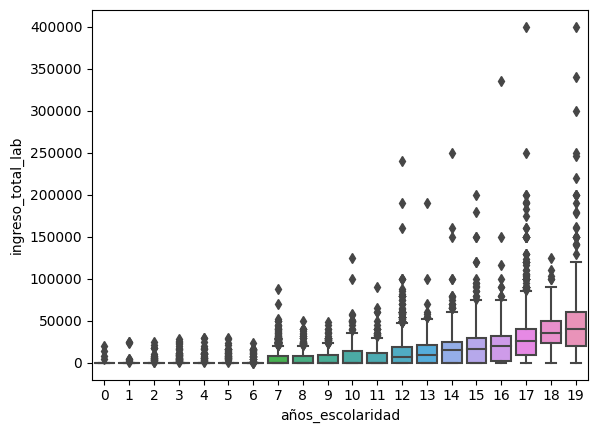

In [49]:
sns.boxplot(x=dataframe['años_escolaridad'], y=dataframe['ingreso_total_lab'])

## Boxplot ingreso total laborable
+ La distribucion de los datos es asimetrica hacia la derecha
esto tiene sentido ya que hay varias personas en el dataset que no trabajan o no tienen edad para trabajar (ponele), 
+ podemos ver que la media es de aproximadamente 13300 pesos, lo cual se aproxima al salario minimo de 2018 (11 mil pesos)

http://www.siasueldos.com/salario-m%C3%ADnimo-vital-y-m%C3%B3vil-actualizaci%C3%B3n-de-montos-septiembre-y-diciembre-2018#:~:text=24%20Septiembre%202018-,SALARIO%20M%C3%8DNIMO%20VITAL%20Y%20M%C3%93VIL%2DACTUALIZACI%C3%93N%20DE%20MONTOS%2DSEPTIEMBRE%20Y,%3A%20%24%2011.300%2C%2D%20mensuales.

+ Encontramos muchos valores atipicos lo que representa que los sueldos mas altos le corresponden a pocsas personas y la mayoria de personas tiene sueldos mas bajos

In [67]:
dataframe['ingreso_total_lab'].describe()

count     14371.000000
mean      13330.370120
std       21726.086236
min           0.000000
25%           0.000000
50%         800.000000
75%       20000.000000
max      400000.000000
Name: ingreso_total_lab, dtype: float64

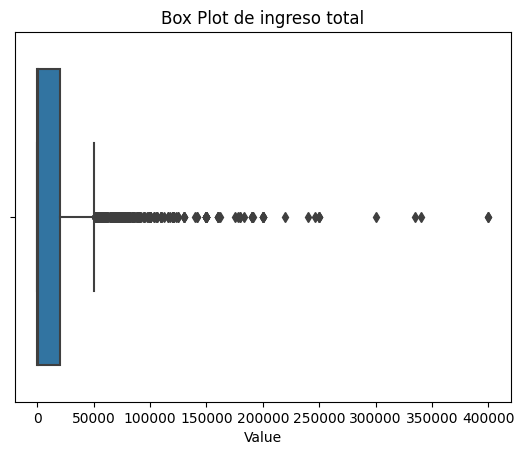

In [50]:
sns.boxplot(x=dataframe['ingreso_total_lab'])
plt.title('Box Plot de ingreso total')
plt.xlabel('Value')
plt.show()

## Vemos la escolaridad podemos ver que en promedio las personas tienen 12 años de escolaridad lo que equivaldria a un secundario completo
+ con un describe vemos que la media esta mas cerca de 0 que la mediana, esto se debe a que hay personas que aun son muy jovenes como para ir a la escuela como tambien hay gente que no asistio o no la termino

In [68]:
dataframe['años_escolaridad'].describe()

count    14371.000000
mean        10.776564
std          5.337461
min          0.000000
25%          7.000000
50%         12.000000
75%         15.000000
max         19.000000
Name: años_escolaridad, dtype: float64

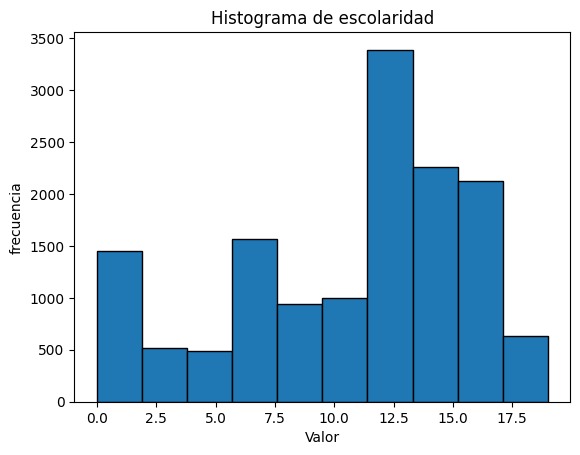

In [51]:
plt.hist(dataframe['años_escolaridad'], bins=10, edgecolor='black')
plt.title('Histograma de escolaridad')
plt.xlabel('Valor')
plt.ylabel('frecuencia')
plt.show()

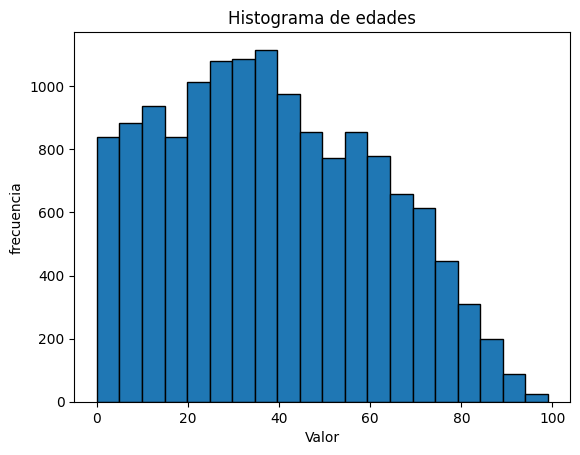

In [52]:
plt.hist(dataframe['edad'], bins=20, edgecolor='black')
plt.title('Histograma de edades')
plt.xlabel('Valor')
plt.ylabel('frecuencia')
plt.show()

## Hijos_nacidos_vivos
+ El nombre de esta variable es un poco confuso, se puede asumir que se refiere a partos
+ La idea es que No representa que la persona no tiene hijos
+ Si representa que si tiene hijos

<Axes: xlabel='hijos_nacidos_vivos', ylabel='count'>

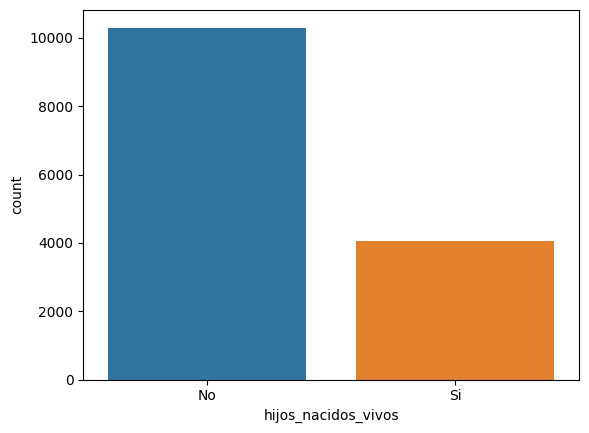

In [53]:
sns.countplot(x='hijos_nacidos_vivos', data=dataframe)

## Dominio
Usamos este plot para ver como se distribuye la gente si en partes de la ciudad o una villa de emergencia

<Axes: xlabel='dominio', ylabel='count'>

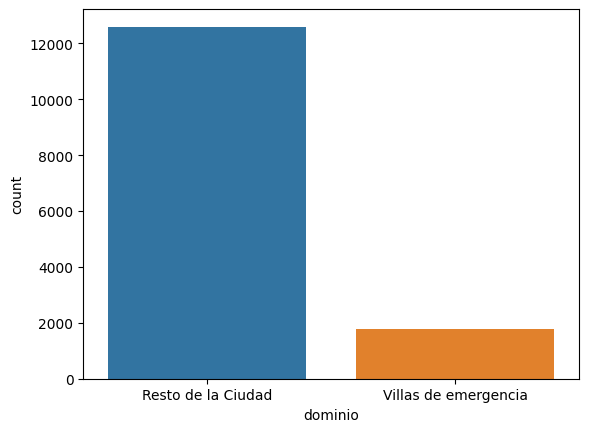

In [54]:
sns.countplot(x='dominio', data=dataframe)

In [55]:
cantidad_situacion_conyugal = dataframe['situacion_conyugal'].value_counts()

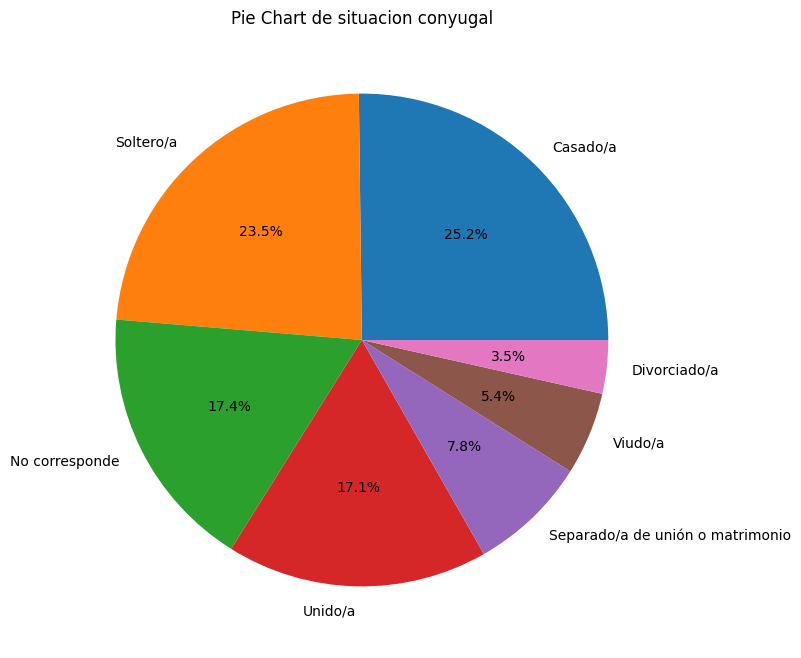

In [56]:
plt.figure(figsize=(8, 8))
plt.pie(cantidad_situacion_conyugal, labels=cantidad_situacion_conyugal.index, autopct='%1.1f%%')
plt.title('Pie Chart de situacion conyugal')
plt.show()

In [57]:
cantidad_afiliacion_salud = dataframe['afiliacion_salud'].value_counts()

## afiliacion_salud
+ vemos la proporcion de personas que tienen cada servicio
+ despues hacemos un boxplot en funcion de los ingresos para ver si hay alguna relacion entre estas variables

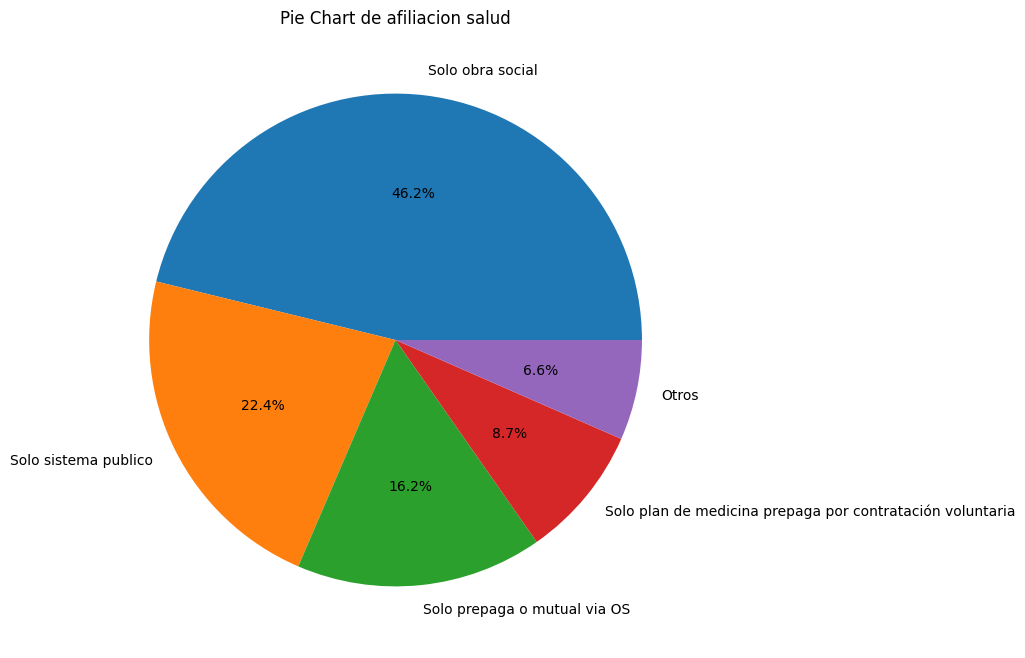

In [58]:
plt.figure(figsize=(8, 8))
plt.pie(cantidad_afiliacion_salud, labels=cantidad_afiliacion_salud.index, autopct='%1.1f%%')
plt.title('Pie Chart de afiliacion salud')
plt.show()

Text(0.5, 1.0, 'Grafico de Afiliacion_salud en funcion de los ingresos')

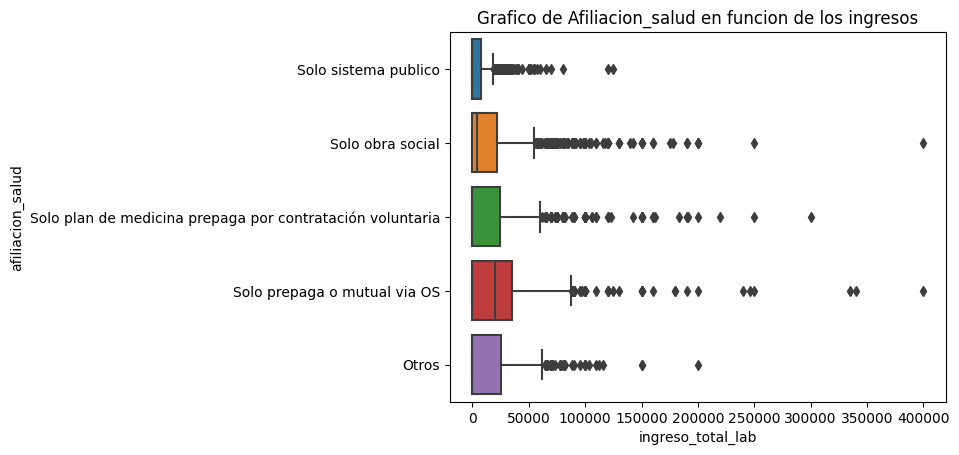

In [71]:
sns.boxplot(x=dataframe['ingreso_total_lab'], y=dataframe['afiliacion_salud'])
plt.title("Grafico de Afiliacion_salud en funcion de los ingresos")

# correlaciones
en las variables numericas

<Axes: >

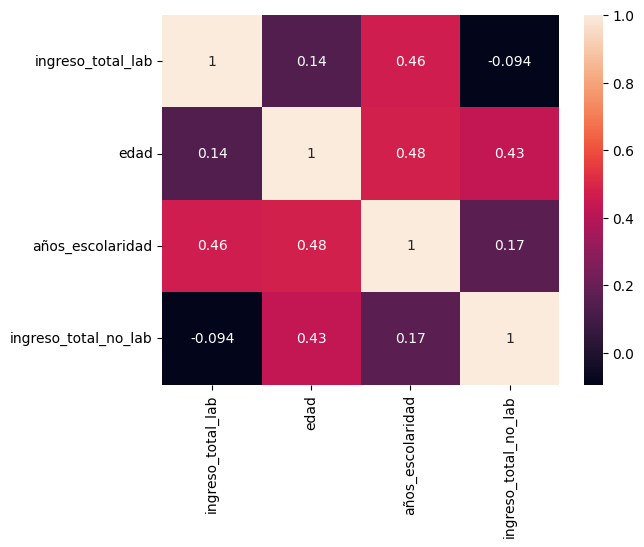

In [72]:
sns.heatmap(dataframe[['ingreso_total_lab', 'edad','años_escolaridad', 'ingreso_total_no_lab']].corr(), annot=True)

# Crear dummies

## Codear datos categoricos

todavia no

In [60]:
def num_or_cat(df):
    categorical = df.select_dtypes(include='object').columns
    numerical = df.select_dtypes(exclude='object').columns

    return(categorical, numerical)

In [61]:
categorical_cols, numerical_cols= num_or_cat(dataframe)
categorical_cols

Index(['dominio', 'sexo', 'parentesco_jefe', 'situacion_conyugal',
       'num_miembro_padre', 'num_miembro_madre', 'estado_ocupacional',
       'cat_ocupacional', 'calidad_ingresos_lab', 'calidad_ingresos_no_lab',
       'calidad_ingresos_totales', 'calidad_ingresos_familiares',
       'estado_educativo', 'sector_educativo', 'nivel_actual',
       'nivel_max_educativo', 'lugar_nacimiento', 'afiliacion_salud',
       'hijos_nacidos_vivos'],
      dtype='object')

In [62]:
booleanas = []
for col in categorical_cols:
    if len(dataframe[col].unique()) == 2:
        booleanas.append(col)
booleanas

['dominio', 'sexo', 'hijos_nacidos_vivos']

In [63]:
dominio_dummie = pd.get_dummies(dataframe['dominio']).astype(int)
hijos_nacidos_vivos_dummie = pd.get_dummies(dataframe['hijos_nacidos_vivos'])
#sexo_dummie = pd.get_dummies(dataframe['sexo']).astype(int)

In [64]:
dataframe = pd.concat([dataframe, dominio_dummie], axis=1)
dataframe = pd.concat([dataframe, hijos_nacidos_vivos_dummie], axis=1)
#dataframe = pd.concat([dataframe, sexo_dummie], axis=1)

In [65]:
dataframe = dataframe.drop(labels='dominio',axis=1)
dataframe = dataframe.drop(labels='hijos_nacidos_vivos',axis=1)
#dataframe = dataframe.drop(labels='sexo',axis=1)

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Formula modelo

# variable a predecir: 
+ ingreso_total_lab

# Variables dependientes
+ miembro (establece si el individuo pertenece a una villa de emergencia o al resto de la ciudad) cat
+ situacion_conyugal cat 
+ edad num
+ afiliacion_salud cat
+ años_escolaridad num
+ hijos_nacidos_vivos cat

